# Matérn kernels

- Test the function for a Matérn field

$C_{\nu}(\bm{h}) = \frac{\sigma^{2}}{2^{\nu-1} \Gamma\left(\nu\right)} \left(\sqrt{2\nu}\dfrac{\left\lVert \bm{h} \right\rVert}{l} \right)^{\nu} \cdot \mathrm{K}_{\nu} \left(\sqrt{2\nu}\dfrac{\left\lVert \bm{h} \right\rVert}{l} \right), \bm{h} \in \mathbb{R}^{d}$

- Load the required modules

$(\mathcal{\kappa}^{2} - \Delta)^{\alpha}Z = W$

$(\mathcal{\kappa}^{2} - \Delta)^{\alpha-1}(\mathcal{\kappa}^{2} - \Delta)Z = W$

In [1]:
import logging
from pathlib import Path
import os
from typing import Union
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import matplotlib as mpl
import spde

- Type hints definition for numpy arrays

In [2]:
NDArrayFloat = npt.NDArray[np.float64]
NDArrayInt = npt.NDArray[np.int64]
Int = Union[int, NDArrayInt]

- Set-up logging level

In [3]:
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.info("this is a logging test")

INFO:root:this is a logging test


- Check package/software versions

In [4]:
logging.info(f"numpy version = {np.__version__}")
logging.info(f"matplotlib version = {mpl.__version__}")

INFO:root:numpy version = 1.23.5
INFO:root:matplotlib version = 3.7.1


- Set a random number generator to obtain reproducible results. Here , we generate a seed from a cool sentence (Note: this is an incremental generator)


In [5]:
rng = np.random.default_rng(np.abs(hash("mike is the best")))

- Create a directory to store the exported figures

In [6]:
ipynb_path = os.path.dirname(os.path.realpath("__file__"))
fig_save_path = Path(ipynb_path, "exported_figures")
fig_save_path.mkdir(parents=True, exist_ok=True)  # make sure that the directory exists

In [7]:
len_scale = 20.0
std = 150.0
spatial_dim = 2


# Exponential covariance model # nu = 0.5
def kernel_nu_12(r: NDArrayFloat) -> NDArrayFloat:
    return (std**2) * np.exp(-r)


# Exponential covariance model # nu = 1.5
def kernel_nu_32(r: NDArrayFloat) -> NDArrayFloat:
    return (std**2) * (1 + np.sqrt(3) * r) * np.exp(-np.sqrt(3) * r)


# Exponential covariance model # nu = 2.5
def kernel_nu_52(r: NDArrayFloat) -> NDArrayFloat:
    return (std**2) * (1 + np.sqrt(5) * r + 5 * r**2 / 3) * np.exp(-np.sqrt(5) * r)


# Gaussian covariance model
def sk_matern_kernel_wrapper(r: NDArrayFloat, _nu) -> NDArrayFloat:
    _alpha = (_nu + spatial_dim / 2) / 2
    return (std**2) * spde.sk_matern_kernel(
        r * len_scale, 1 / len_scale, _alpha, spatial_dim=spatial_dim
    )


def custom_matern_kernel_wrapper(r: NDArrayFloat, _nu) -> NDArrayFloat:
    return (std**2) * spde.matern_kernel(r * len_scale, len_scale, _nu)

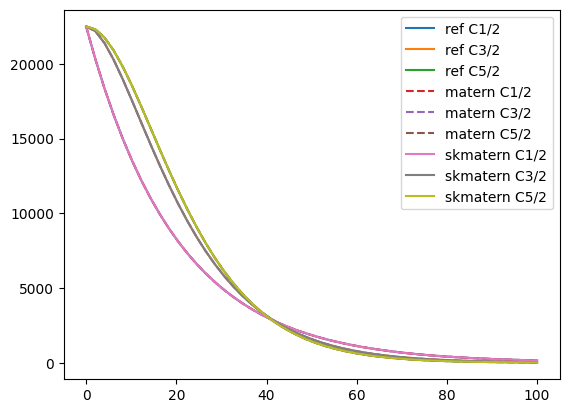

In [8]:
x = np.linspace(0.0, 100, 50)
plt.plot(x, kernel_nu_12(x / len_scale), label="ref C1/2")
plt.plot(x, kernel_nu_32(x / len_scale), label="ref C3/2")
plt.plot(x, kernel_nu_52(x / len_scale), label="ref C5/2")
plt.plot(
    x,
    custom_matern_kernel_wrapper(x / len_scale, 0.5),
    label="matern C1/2",
    linestyle="--",
)
plt.plot(
    x,
    custom_matern_kernel_wrapper(x / len_scale, 1.5),
    label="matern C3/2",
    linestyle="--",
)
plt.plot(
    x,
    custom_matern_kernel_wrapper(x / len_scale, 2.5),
    label="matern C5/2",
    linestyle="--",
)
plt.plot(x, sk_matern_kernel_wrapper(x / len_scale, 0.5), label="skmatern C1/2")
plt.plot(x, sk_matern_kernel_wrapper(x / len_scale, 1.5), label="skmatern C3/2")
plt.plot(x, sk_matern_kernel_wrapper(x / len_scale, 2.5), label="skmatern C5/2")
plt.legend()